In [1]:
from torchvision.datasets.utils import download_url
import torch
import tarfile
import os
import configparser
from Data_function.DatasetFolder import Dataset
from Data_function.Transfomer import  Transform
from torch.utils.data import DataLoader
from utils.utils import show_batch, get_default_device
from Framework.Framework import Framework
from models.Resnet.Resnet18 import Resnet18 as Model

Read config

In [2]:
#get data from config file
config = configparser.ConfigParser()
config.read('./config/ConfigFile.properties')
width = int(config["config"]['width'])
height = int(config['config']['height'])
resize = (width, height)
mean = [float(x) for x in config['config']['mean'].split(', ')]
std = [float(x) for x in config['config']['std'].split(', ')]
batch = int(config['config']['batch'])
num_worker = int(config['config']['num_worker'])
lr = float(config['config']['lr'])
epochs = int(config['config']['epochs'])

Create dataset/dataloader

In [3]:
# Download the dataset

# dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
# download_url(dataset_url, '.')

# Extract from archive
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
    tar.extractall(path='./data')

# Look into the data directory
data_dir = './data/cifar10'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)    

['test', 'train']
['cat', 'airplane', 'ship', 'frog', 'automobile', 'truck', 'deer', 'horse', 'dog', 'bird']


In [4]:
transformers = Transform(resize=resize, mean= mean, std=std)

In [5]:
# Create dataset
train_dataset = Dataset(root_folder='./data/cifar10/train', transformer=transformers, phase='train')
val_dataset = Dataset(class_mapping = train_dataset.class_mapping, root_folder='./data/cifar10/test', transformer=transformers, phase = 'val')

In [6]:
print(val_dataset.__len__())
print(val_dataset.num_classes())


10000
10


In [7]:
# Create dataloader
train_dl = DataLoader(dataset = train_dataset, batch_size = batch, num_workers=num_worker, shuffle=True)
val_dl = DataLoader(dataset = val_dataset, batch_size = batch*2, num_workers=num_worker)

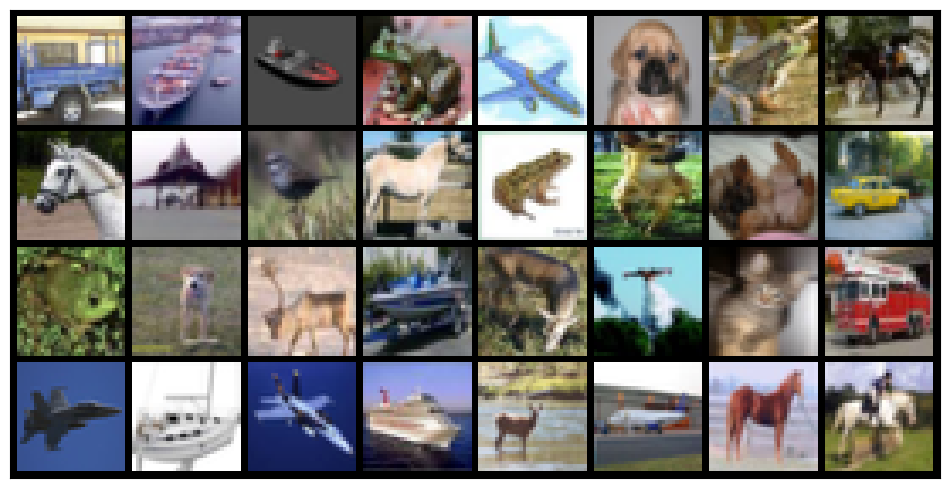

In [8]:
show_batch(train_dl, mean, std)

In [9]:
framework = Framework()


In [10]:
model = Model(in_channels=3, num_classes= 100)
# model.load_state_dict(torch.load("./Each_epoch/model_epoch_4.pt"))

/home/merlin22/anaconda3/envs/datbt/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/merlin22/anaconda3/envs/datbt/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [11]:
model

Resnet18(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_ru

In [12]:
optimizer = torch.optim.SGD(model.parameters(), lr, momentum=0.9)
loss_function = torch.nn.CrossEntropyLoss()
scheduler = torch.opti= torch.optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.5)

In [13]:
framework.fit(model, train_dl= train_dl, val_dl = val_dl, lr= lr, epochs=epochs, optimizer= optimizer, scheduler = scheduler, loss_func=loss_function, save_each_model='Each_epoch', save_model='output.pt')

train


100%|██████████| 1563/1563 [00:47<00:00, 33.03it/s]


val


100%|██████████| 157/157 [00:02<00:00, 67.51it/s]


Epoch [1], train_loss: 2.2622, train_acc: 0.2686, val_loss: 2.0030, val_acc:0.3728
best_loss :2.0030215536117555; lr: 0.01
train


100%|██████████| 1563/1563 [00:47<00:00, 33.06it/s]


val


100%|██████████| 157/157 [00:02<00:00, 66.76it/s]


Epoch [2], train_loss: 1.7228, train_acc: 0.4061, val_loss: 1.9649, val_acc:0.4906
best_loss :1.9649434017181397; lr: 0.01


({'train_loss': [2.2622133290863036, 1.7227691139984131],
  'train_acc': [tensor(0.2686, device='cuda:0', dtype=torch.float64),
   tensor(0.4061, device='cuda:0', dtype=torch.float64)],
  'val_loss': [2.0030215536117555, 1.9649434017181397],
  'val_acc': [tensor(0.3728, device='cuda:0', dtype=torch.float64),
   tensor(0.4906, device='cuda:0', dtype=torch.float64)],
  'lrs': [0.01, 0.01]},
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     initial_lr: 0.01
     lr: 0.01
     maximize: False
     momentum: 0.9
     nesterov: False
     weight_decay: 0
 ),
 1.9649434017181397)